In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [2]:
fish_input  = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [4]:
# Create training sets and test sets
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [5]:
# Standardization preprocessing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [6]:
# "SGD" for Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = "log", max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [8]:
# train one more time!

sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


In [9]:
# early stopping; stop partial learning process before overfitting comes
import numpy as np

sc = SGDClassifier(loss = "log", random_state = 42)
train_score = []
test_score  = []
classes     = np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

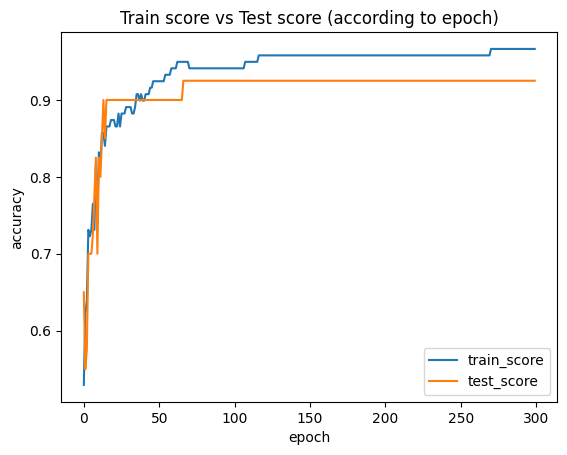

In [14]:
# Visualize
import matplotlib.pyplot as plt

plt.title("Train score vs Test score (according to epoch)")
plt.plot(train_score, label = "train_score")
plt.plot(test_score, label = "test_score")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [12]:
# It seems that 100 epoch is the most optimized (avoid overfitting and find the best test score)

sc = SGDClassifier(loss = "log", max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [15]:
# Use hinge loss

sc = SGDClassifier(loss = "hinge", max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
